# Bangla Digit Classification
Dataset provided by MD. Arif

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,8,251,252,1,247,249,254,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,...,255,252,254,255,254,6,0,239,253,255
2,9,255,255,255,255,254,255,250,253,253,...,255,255,255,255,255,255,255,255,255,255
3,0,255,254,255,255,255,255,254,254,254,...,31,244,255,255,255,251,254,254,254,255
4,0,255,255,255,255,255,254,254,254,255,...,254,253,254,253,253,254,254,254,255,255


1. Create features and target array.
2. Scale features array.
3. Split dataset in training and test set with ratio of 0.3

In [3]:
X = df.drop("Label", axis=1).values
y = df["Label"].values

## I'm using two kind of scaling
* sklearn.preprocessing.StandardScaler (using variable std_X)
* Simply dividing all values by 255. This will make the range of data [0,1]

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_X = sc.fit_transform(X)
std_X

array([[ -0.11464388,  -0.02393645, -12.80894999, ...,   0.40316392,
          0.39639535,   0.33062486],
       [  0.11864656,   0.12658178,   0.13324576, ...,   0.19812513,
          0.37104972,   0.33062486],
       [  0.11864656,   0.12658178,   0.13324576, ...,   0.40316392,
          0.39639535,   0.33062486],
       ...,
       [ -0.05632127,  -0.02393645,   0.13324576, ...,   0.40316392,
          0.39639535,   0.33062486],
       [  0.11864656,   0.12658178,   0.13324576, ...,   0.37753408,
          0.39639535,   0.33062486],
       [  0.11864656,   0.12658178,   0.13324576, ...,   0.40316392,
          0.39639535,   0.33062486]])

In [5]:
X = X / 255
X
# try minMaxScaler

array([[0.98431373, 0.98823529, 0.00392157, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.9372549 , 0.99215686,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.98823529, 0.98823529, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99215686, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [6]:
X.min(), X.max()

(0.0, 1.0)

## Spliting the dataset using train_test_split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
std_X_train, std_X_test, std_y_train, std_y_test = train_test_split(std_X, y, test_size=0.3, random_state=42)

# Stochastic Gradient Descent


In [26]:
from sklearn.linear_model import SGDClassifier
sgd_clf_1 = SGDClassifier(random_state=42)
sgd_clf_2 = SGDClassifier(random_state=42)

sgd_clf_1.fit(X_train, y_train)
sgd_clf_2.fit(std_X_train, std_y_train)

y_pred = sgd_clf_1.predict(X_test)
std_y_pred = sgd_clf_1.predict(std_X_test)

n_correct = sum(y_pred == y_test)
std_n_correct = sum(std_y_pred == std_y_test)

print(n_correct, std_n_correct)
print("\n")
print(n_correct/len(y_pred), std_n_correct/len(std_y_pred))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


3897 3152


0.8316261203585147 0.6726419120785317


## Using cross validation and KFold

In [9]:
from sklearn.model_selection import cross_val_score, KFold

sgd_clf_3 = SGDClassifier(random_state=42)
sgd_clf_4 = SGDClassifier(random_state=42)

kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_1 = cross_val_score(sgd_clf_3, X_train, y_train, cv=kf)
cv_2 = cross_val_score(sgd_clf_4, std_X_train, std_y_train, cv=kf)
print(cv_1, cv_2)

[0.82062534 0.80526604 0.80186608 0.76838639 0.82327113 0.8079034 ] [0.82062534 0.80526604 0.80186608 0.76838639 0.82327113 0.8079034 ]


### StandarScaler and hard coded scaling perform same. We'll use hard coded scaling from now on.

In [10]:
# Experiment with different n_splits value
sgd_clf_5 = SGDClassifier(random_state=42)
kf_2 = KFold(n_splits=3, shuffle=True, random_state=42)
cv_3 = cross_val_score(sgd_clf_5, X_train, y_train, cv=kf_2)
cv_3

array([0.82057613, 0.80329218, 0.8183315 ])

In [11]:
kf_3 = KFold(n_splits=5, shuffle=True, random_state=42)
cv_4 = cross_val_score(sgd_clf_5, X_train, y_train, cv=kf_3)
cv_4

array([0.81801555, 0.81115684, 0.80749886, 0.82898948, 0.83760293])

## Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix

con_mx = confusion_matrix(y_test, y_pred) # predictions are from sgd_clf_1
con_mx

array([[441,   8,   7,   4,   0,   5,  12,   5,   5,  12],
       [  6, 386,   6,   6,   0,   9,   7,   1,   7,  37],
       [  7,   5, 424,   3,  10,   7,   6,   4,   6,  10],
       [  6,   3,   7, 396,   0,   6,  48,   1,   4,  19],
       [  6,   6,   9,   3, 355,  16,   9,   4,   5,   7],
       [  6,   5,  13,   7,   5, 356,  63,   7,  10,   8],
       [  3,   2,   8,  33,   1,  10, 374,   2,   9,  14],
       [  1,   0,  13,   5,   3,  10,   7, 382,   2,  13],
       [  5,   1,  10,   3,   2,   5,  12,   0, 422,  10],
       [  6,  43,  19,  11,   6,   4,  15,   5,  18, 361]], dtype=int64)

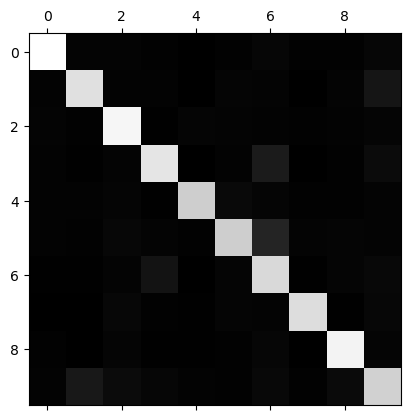

In [13]:
plt.matshow(con_mx, cmap=plt.cm.gray)

### 5,6 and 3,6 are more error-prone 

## Precision and Recall

In [14]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)

print(precision, recall)

[0.90554415 0.84095861 0.82170543 0.84076433 0.92931937 0.8317757
 0.67631103 0.92944039 0.8647541  0.73523422] [0.88376754 0.83010753 0.87966805 0.80816327 0.8452381  0.74166667
 0.82017544 0.87614679 0.89787234 0.7397541 ]


### 6 has very low precision
How can we increase it's precision?

# K Nearest Neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)

knn_n_correct = sum(knn_y_pred == y_test)
print("Number of correct predictions:", knn_n_correct)
print("Accuracy:", knn_n_correct/len(y_pred))

Number of correct predictions: 4124
Accuracy: 0.8800682885189928


result in SGDClassifier is 3897.

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lgr_clf = LogisticRegression(solver = 'liblinear')
lgr_clf.fit(X_train, y_train)
lgr_y_pred = lgr_clf.predict(X_test)

lgr_n_correct = sum(lgr_y_pred == y_test)
print("Number of correct predictions:", lgr_n_correct)
print("Accuracy:", lgr_n_correct/len(y_pred))

Number of correct predictions: 3914
Accuracy: 0.8352539479300043


# Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
rnd_y_pred = rnd_clf.predict(X_test)

rnd_n_correct = sum(rnd_y_pred == y_test)
print("Number of correct predictions:", rnd_n_correct)
print("Accuracy:", rnd_n_correct/len(y_pred))

Number of correct predictions: 3687
Accuracy: 0.7868117797695262


# SVM Classifier

In [7]:
from sklearn.svm import SVC

In [9]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)

svm_n_correct = sum(svm_y_pred == y_test)
print("Number of correct predictions:", svm_n_correct)
print("Accuracy:", svm_n_correct/len(svm_y_pred))

Number of correct predictions: 4250
Accuracy: 0.9069568928723858


In [ ]:
svm_clf.score(X_test, y_test)

In [26]:
svm_precision = precision_score(y_test, y_pred,average=None)
svm_recall = recall_score(y_test, y_pred,average=None)

print(svm_precision)
print(svm_recall)

[0.90554415 0.84095861 0.82170543 0.84076433 0.92931937 0.8317757
 0.67631103 0.92944039 0.8647541  0.73523422]
[0.88376754 0.83010753 0.87966805 0.80816327 0.8452381  0.74166667
 0.82017544 0.87614679 0.89787234 0.7397541 ]


# Hyperparameter Tuning on SVM Classifier

In [18]:
poly_karnel_svm_clf = SVC(kernel="poly", degree=5, coef0=1, C=1)
poly_karnel_svm_clf.fit(X_train, y_train)
poly_karnel_svm_clf.score(X_test, y_test)

0.9003414425949637

In [33]:
rbf_karnel_svm_clf = SVC(kernel="rbf", gamma=5, C=0.001)
rbf_karnel_svm_clf.fit(X_train, y_train)
rbf_karnel_svm_clf.score(X_test, y_test)

0.08962868117797695

In [ ]:
# LinearSVC

## Searching best hyperparameters using GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV
svm_clf_2 = SVC()

param_grid = [
    {'kernel': ["poly"], 'degree': [3], 'coef0': [1,2,3], 'C': [1,3,5,10]}
]

grid_search = GridSearchCV(svm_clf_2, param_grid, cv=5, scoring="accuracy", return_train_score=True)

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 3, 5, 10], 'coef0': [1, 2, 3], 'degree': [3],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [13]:
grid_search.best_estimator_

SVC(C=1, coef0=1, kernel='poly')

In [16]:
best_svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=1)
best_svm_clf.fit(X_train, y_train)
best_svm_clf.score(X_test, y_test)

0.882202304737516

In [20]:
param_grid_2 = [
    {'kernel': ["poly"], 'degree': [3,5,10], 'coef0': [1], 'C': [1]}
]

grid_search_2 = GridSearchCV(SVC(), param_grid_2, cv=5, scoring="accuracy", return_train_score=True)

In [21]:
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'coef0': [1], 'degree': [3, 5, 10],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [22]:
grid_search_2.best_estimator_

SVC(C=1, coef0=1, degree=10, kernel='poly')

In [23]:
best_svm_clf_2 = SVC(kernel="poly", degree=10, coef0=1, C=1)
best_svm_clf_2.fit(X_train, y_train)
best_svm_clf_2.score(X_test, y_test)

0.9095177123346138

In [27]:
best_svm_clf_3 = SVC(kernel="poly", degree=10, coef0=1, C=1)
best_svm_clf_3.fit(std_X_train, std_y_train)
best_svm_clf_3.score(std_X_test, std_y_test)

0.912932138284251

In [28]:
SVC(kernel="sigmoid", gamma='auto', coef0=1, C=1).fit(std_X_train, std_y_train).score(std_X_test, std_y_test)

0.7833973538198891